# Импорт данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
data = pd.read_csv("data/raw/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# страховка - цель

Страховка в этом наборе данных является целевым значением, которое и нужно определить, для начала определим

In [5]:
print(f"lowest charge {data["charges"].min()}")
print(f"hieghst charge {data["charges"].max()}")
print(f"mean charge {data["charges"].mean()}")

lowest charge 1121.8739
hieghst charge 63770.42801
mean charge 13198.21634233119


# Возраст 

максимальный, минимальный и средний возраст

In [6]:
print(f"lowest age {data["age"].min()}")
print(f"hieghst age {data["age"].max()}")
print(f"mean age {data["age"].mean()}")

lowest age 18
hieghst age 64
mean age 39.08842443729903


как возраст влияет на кол-во денег потраченных на страховку

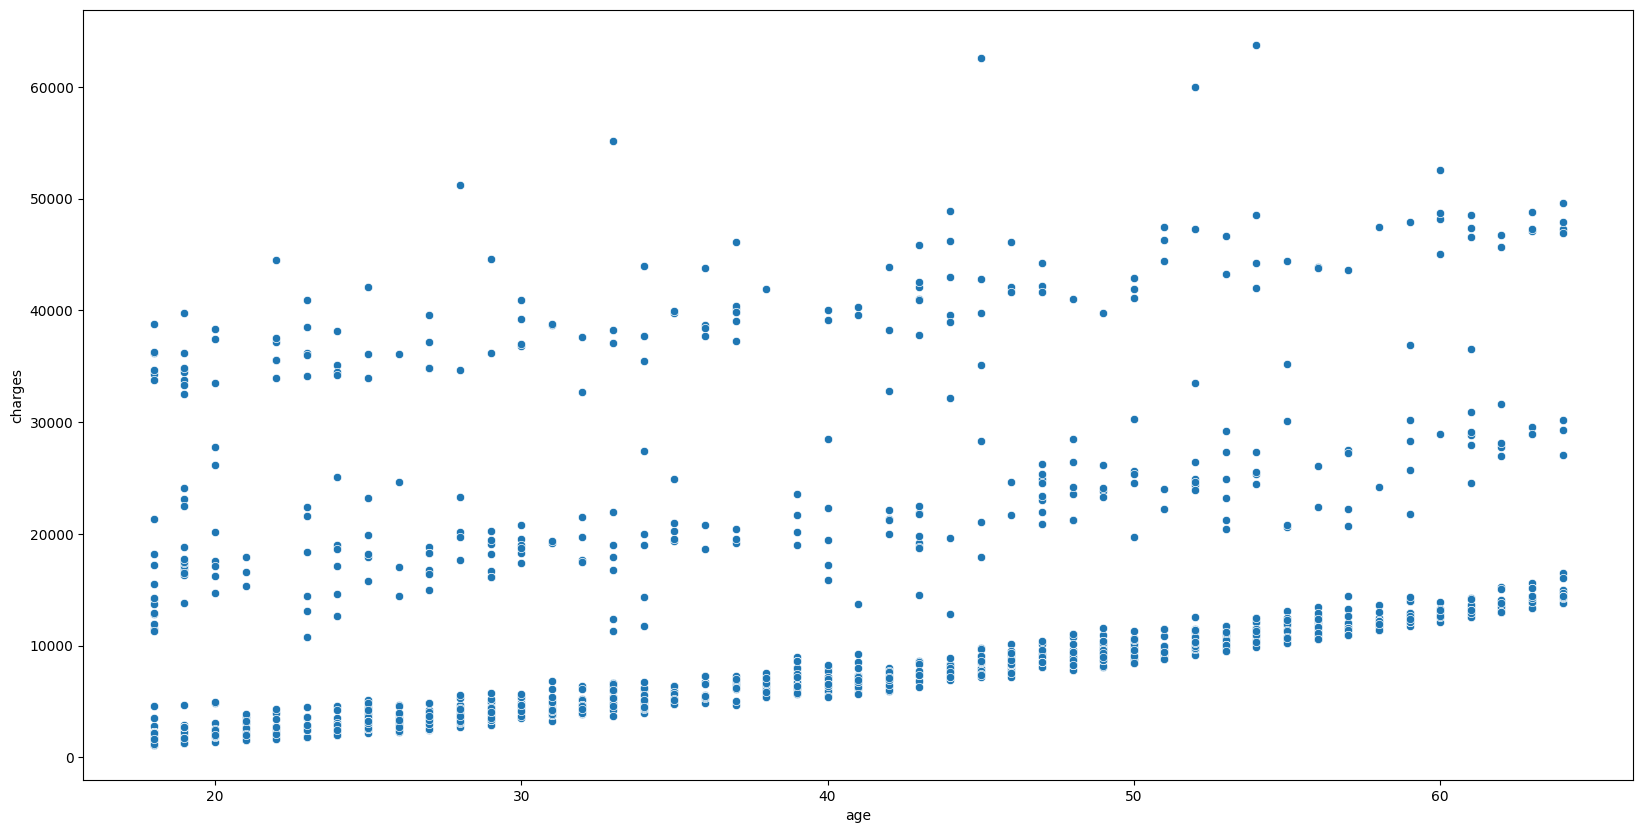

In [7]:
f,ax=plt.subplots(figsize=(20,10))
sns.scatterplot(y="charges",x="age",data =data,ax=ax)
plt.show()

Крайне интересная картина, видно, что со временем кол-во денег которое люди тратят на страховку определнно растет, но как видно график можно разделить на 3 группы людей, подавляющая часть из них тратит на строховку деньги в промежутке от 0 до 15 000, вторая от 10 000  до 30 000, третья тратит на страховку от 30 000 до 50 000. 

# Пол

соотношение мужчин и женщин

In [8]:
data.groupby("sex")["sex"].count()

sex
female    619
male      625
Name: sex, dtype: int64

соотношение полов примерно одинаковое

сколько платят мужчины и женщины 

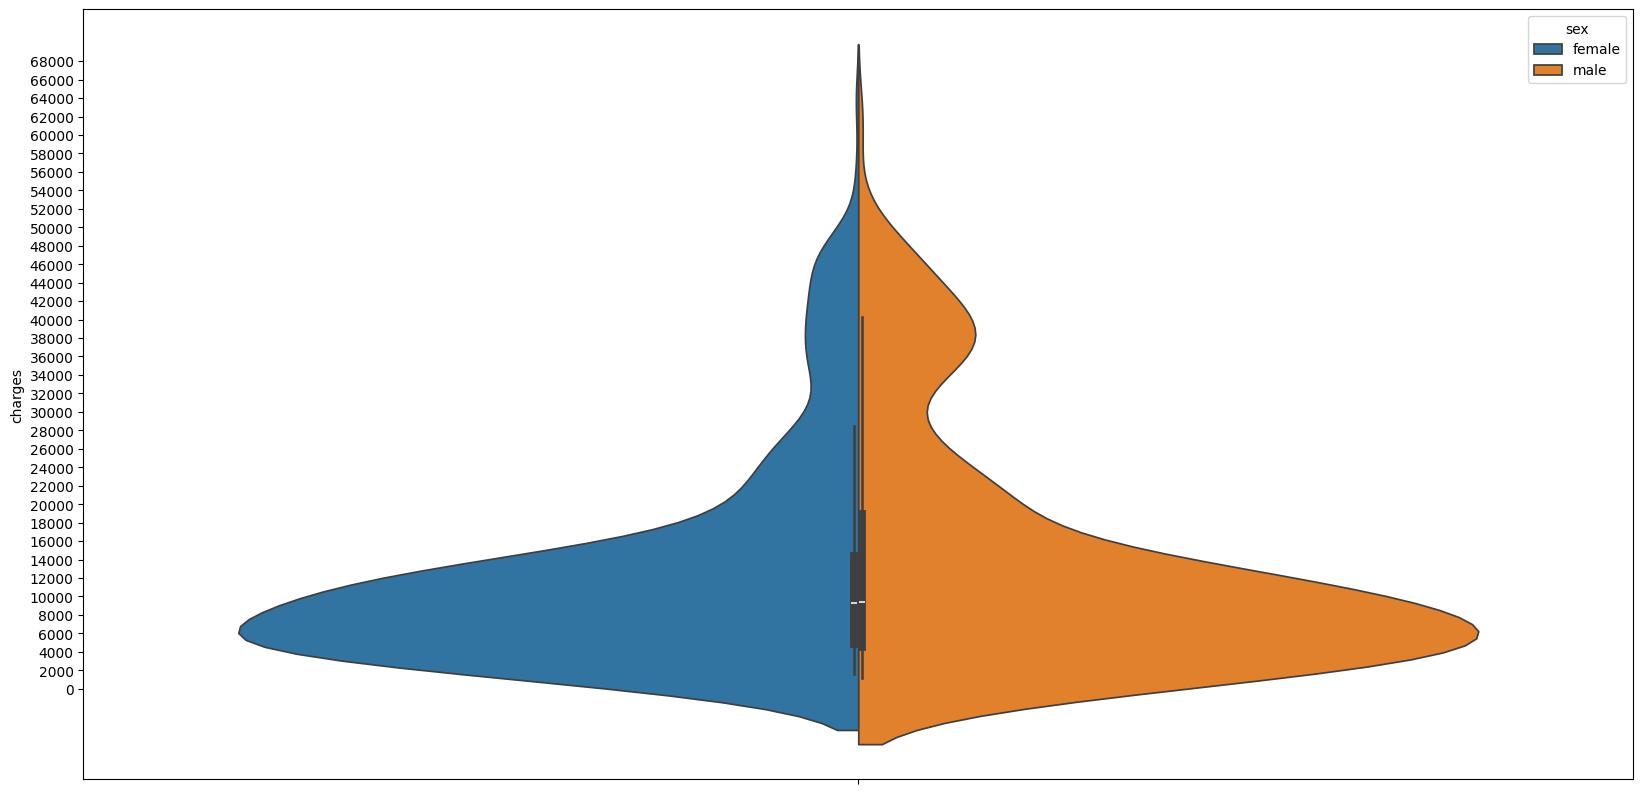

In [9]:
f,ax = plt.subplots(figsize=(20,10))
sns.violinplot(y="charges",hue="sex",data = data,split=True)
ax.set_yticks(range(0,70000,2000))
plt.show()

подавляющая часть платит прмерно 7000-8000, но у мужчин есть выраженный второй максимум,в промежутке около 40 000  

посмотрим кому и сколько лет

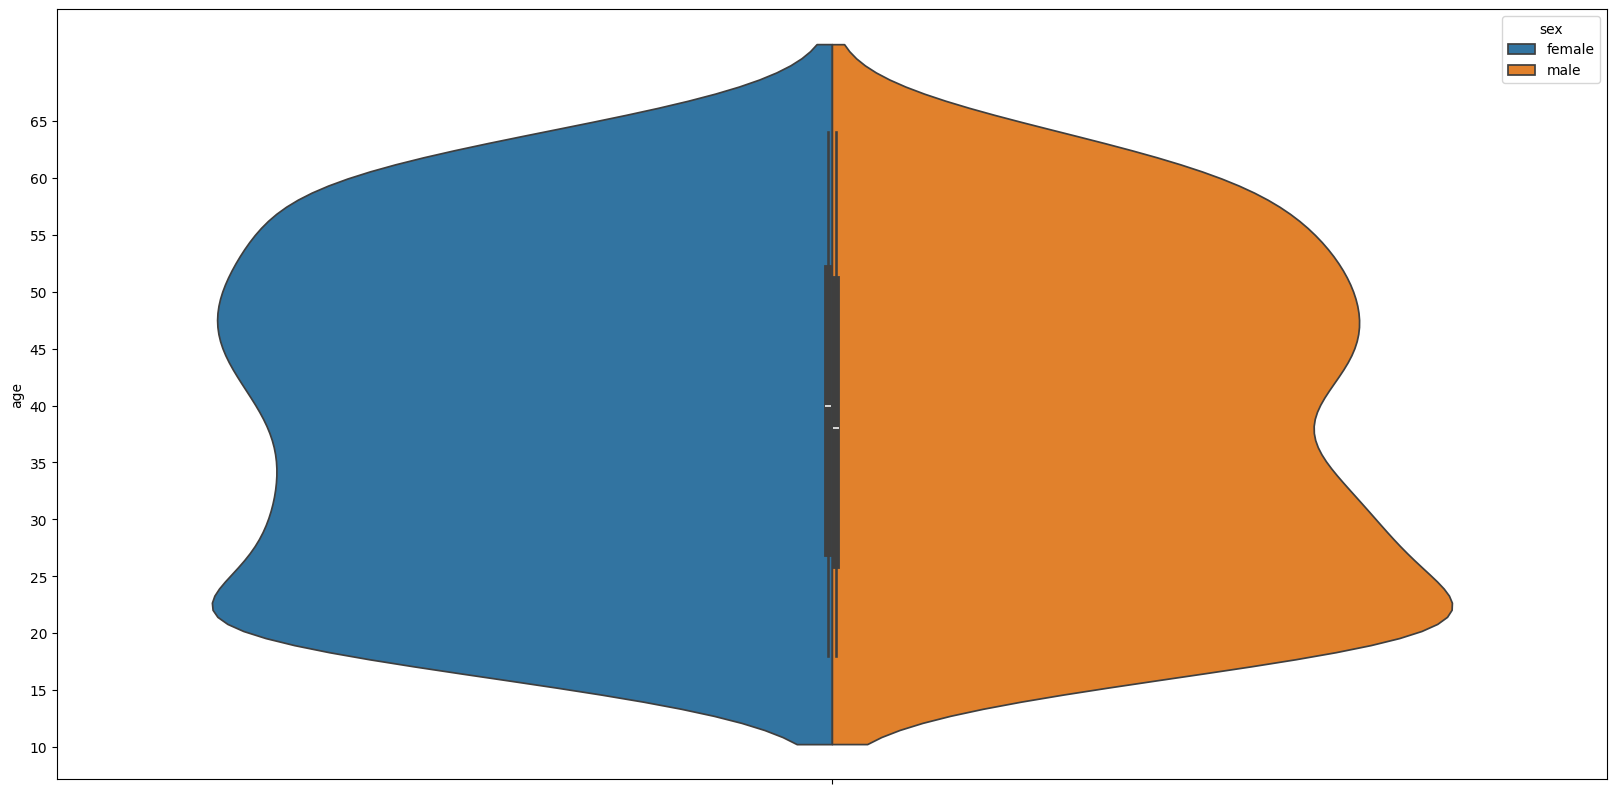

In [10]:
f,ax = plt.subplots(figsize=(20,10))
sns.violinplot(y="age",hue="sex",data = data,split=True)
ax.set_yticks(range(10,70,5))
plt.show()

Нету критического перевеса в одну из сторон, разве что можно сказать, что мужчин в возрасте 20 лет больше чем мужчин в возрасте 50 лет, у женщин есть просадка в возрасте 25-40 лет.

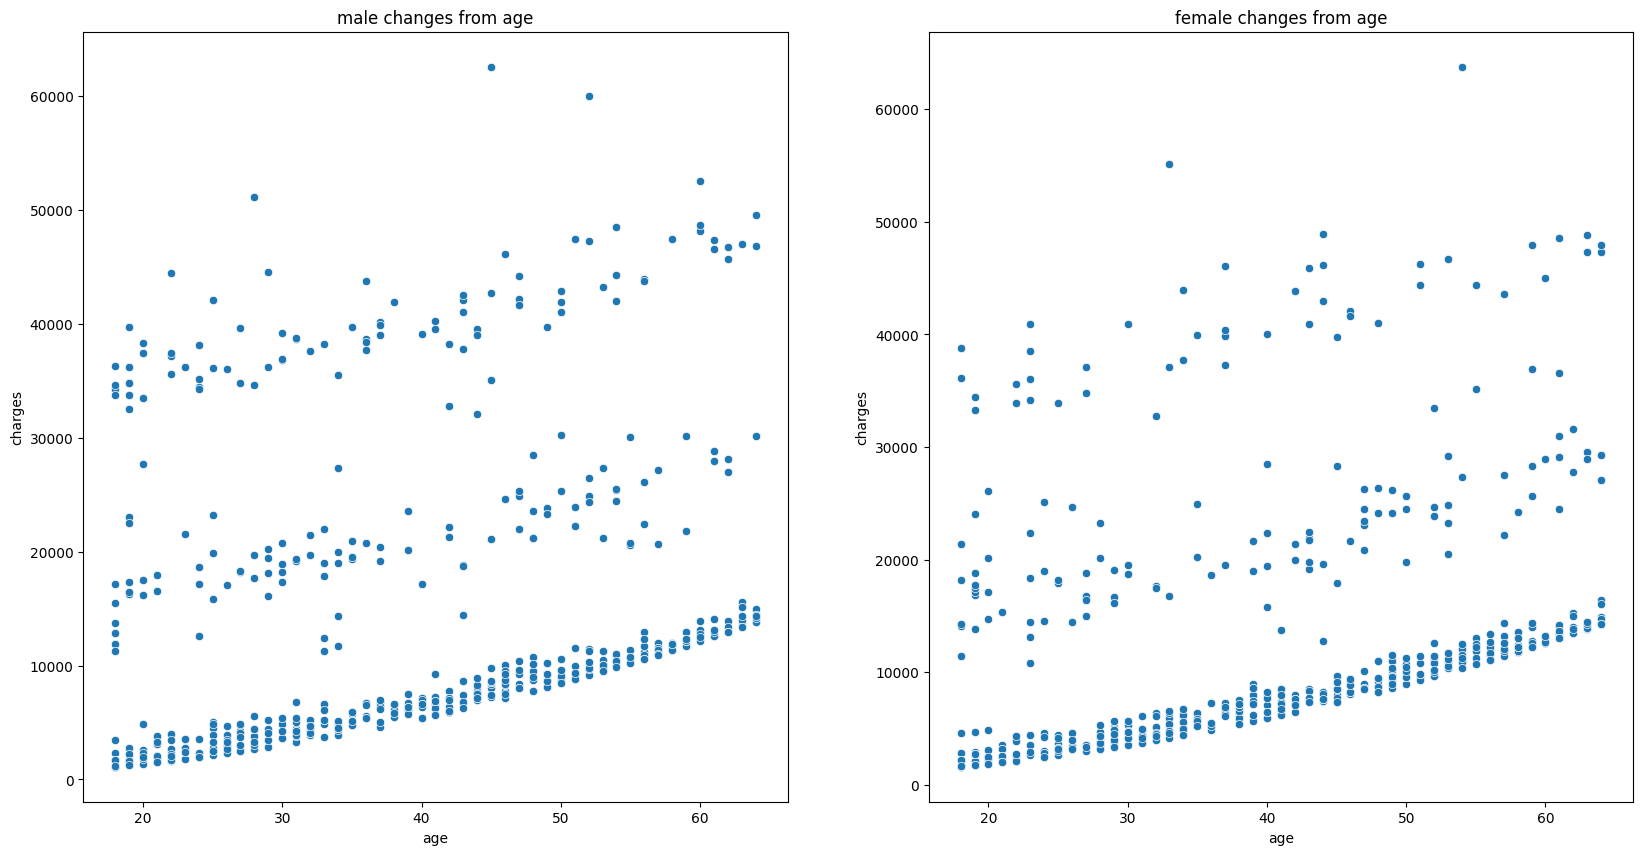

In [11]:
f,ax=plt.subplots(1,2,figsize=(20,10))
mdata=data[["charges","age","sex"]].loc[data["sex"]=="male"]
sns.scatterplot(y="charges",x="age",data=mdata,ax=ax[0])
ax[0].set_title("male charges from age")
fdata=data[["charges","age","sex"]].loc[data["sex"]=="female"]
sns.scatterplot(y="charges",x="age",data=fdata,ax=ax[1])
ax[1].set_title("female changes from age")
plt.show()

Как видно кол-во потраченных денег на страховку с возрастом не зависит от пола, мужчины и женщины тратят примерно одинаковое количество денег при
увеличении возраста.

# Индекс массы тела


Очивидно, что индекс массы тела базируется на харакеристиках тела, таких как пол и возраст, проверим их коррлеяцию между собой

Посмотрим минимальное, максимальное и среднее занчение

In [12]:
print(f"lowest charge {data["bmi"].min()}")
print(f"hieghst charge {data["bmi"].max()}")
print(f"mean charge {data["bmi"].mean()}")

lowest charge 15.96
hieghst charge 53.13
mean charge 30.582857717041797


сначала посмотрим на индекс массы тела у мужчин и женщин, потом посмотрим корреляцию с возрастом

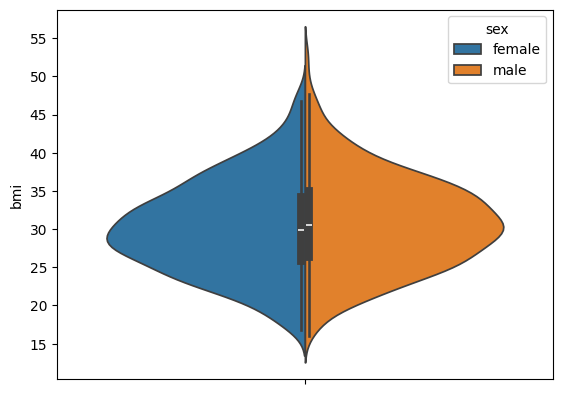

In [13]:
f,ax= plt.subplots(figure=(20,10))
sns.violinplot(y="bmi",hue="sex",data=data,split="True")
ax.set_yticks(range(15,60,5))

как минимум можно заметить, что у подавляющей части людей индекс массы тела приходится на значения от 25 до 30, т.е у большей части людей в этом
наборе данных имеется избыточный вес.

посмотрим зависит ли индекс массы тела от возраста

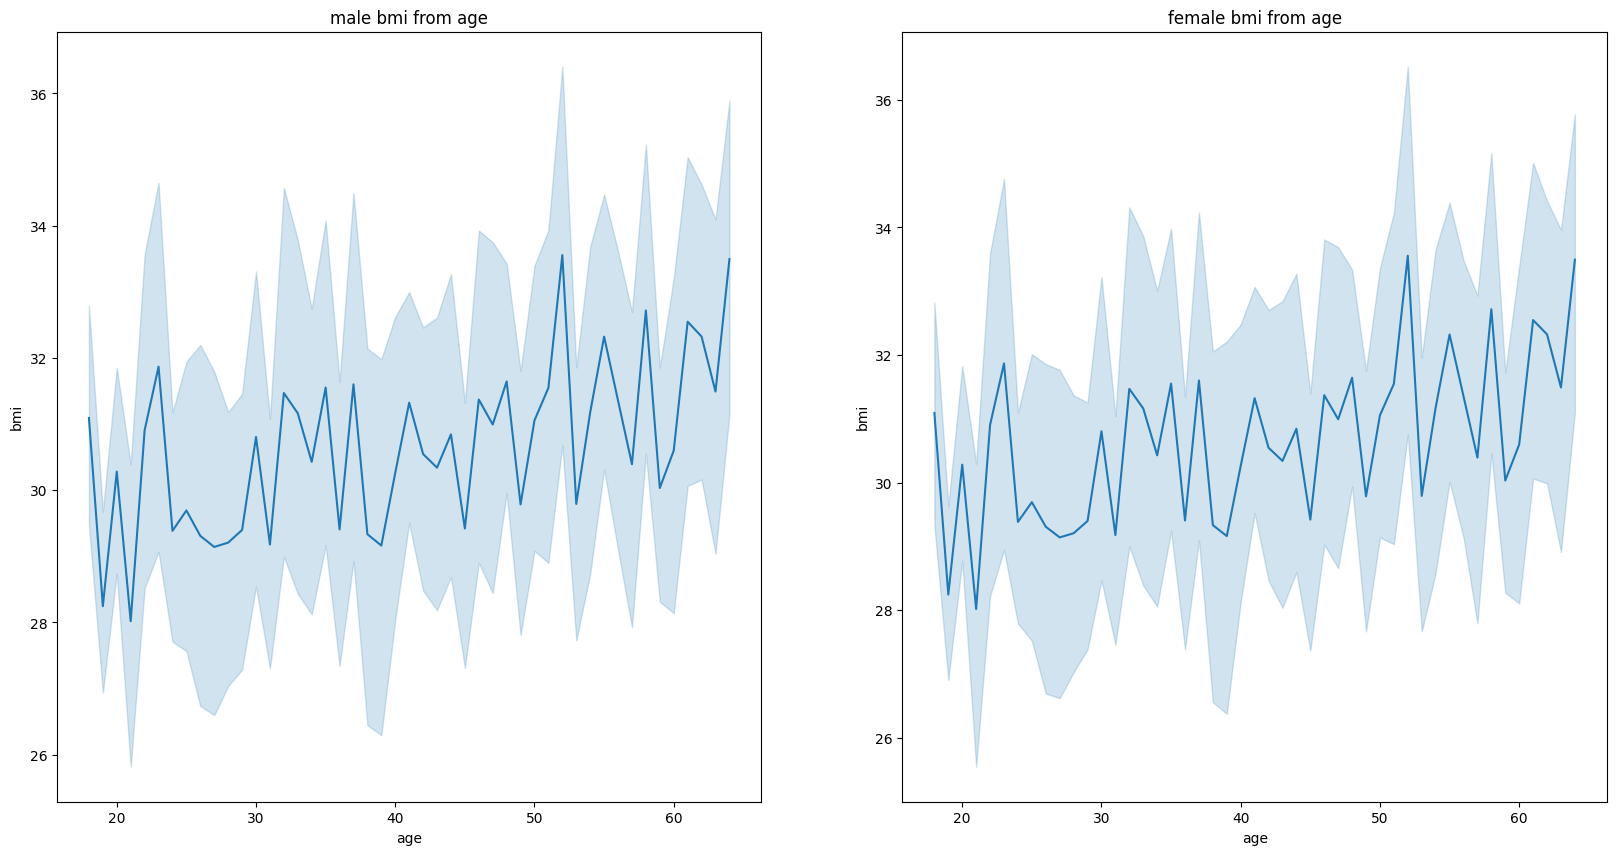

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))
mdata=data.loc[data["sex"]=="male"]
sns.lineplot(y="bmi",x="age",data=data,ax=ax[0])
ax[0].set_title("male bmi from age")
fdata=data.loc[data["sex"]=="female"]
sns.lineplot(y="bmi",x="age",data=data,ax=ax[1])
ax[1].set_title("female bmi from age")
plt.show()

Как можно заметить на индекс массы тела, пускай и незначительно, но растет с возрастом.

теперь проверим как он влияет на то, сколько тратят люди на страховку

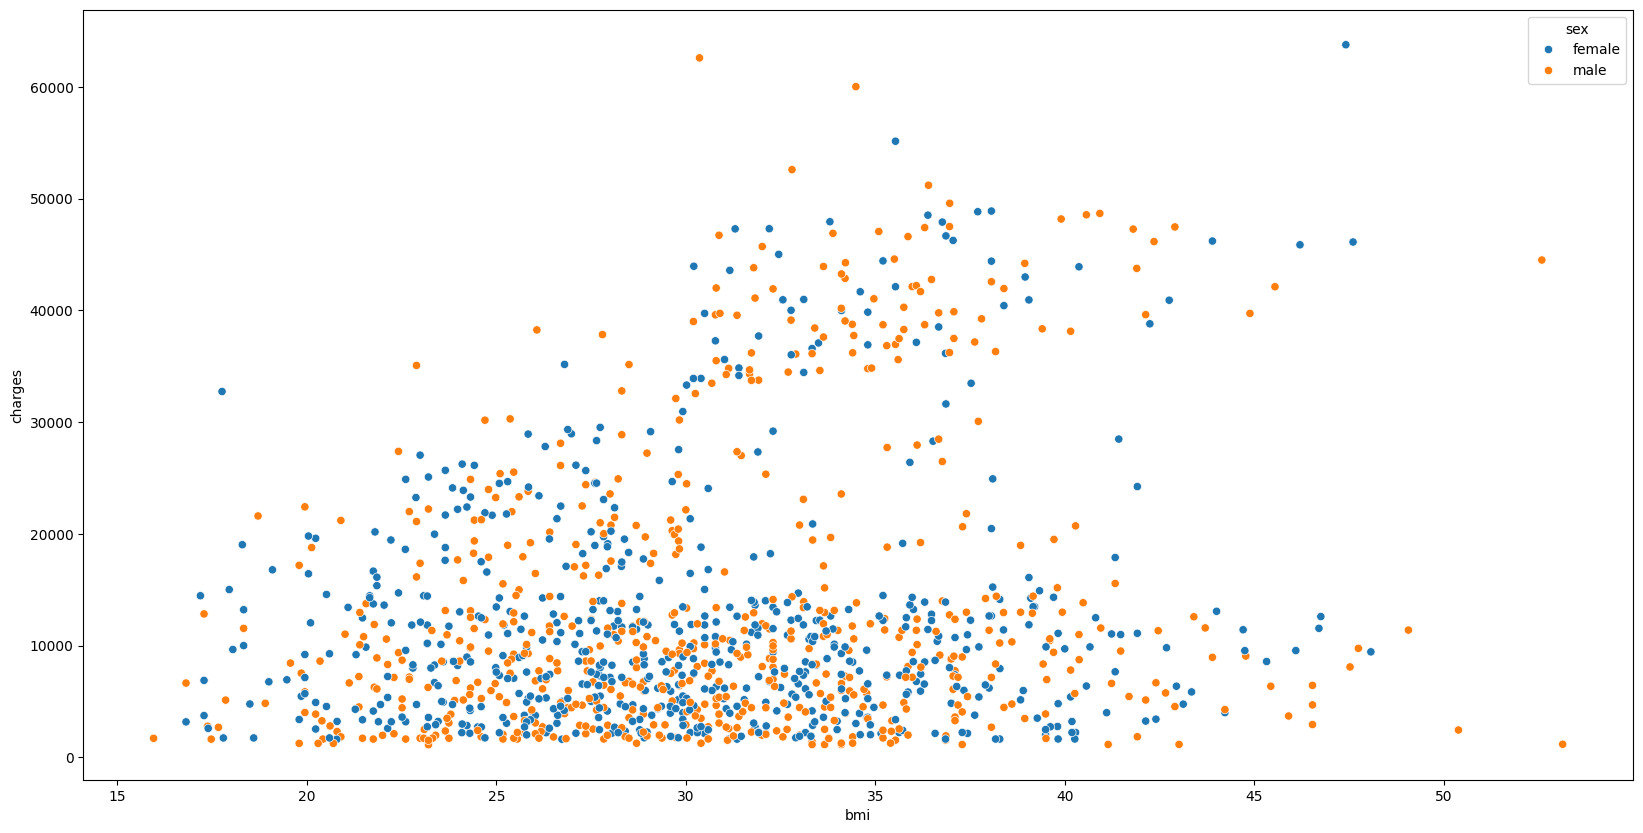

In [15]:
f,ax=plt.subplots(figsize=(20,10))
sns.scatterplot(y="charges",x="bmi",hue="sex",data=data)
plt.show()

Как можно заметить с индуксом массы тела растут и расходы, так же можно заметить что после индекса массы тела 25 (начало ожирения) начинается некторое разделение, на тех кого всё устраивает, и ,судя по всему, тех кому есть дело до своего здоровья.

# количество детей

сначала посмотрим возможное количество детей у человека

In [16]:
data.groupby(["children"])["children"].count()

children
0    533
1    299
2    222
3    148
4     24
5     18
Name: children, dtype: int64

как видно у человека может быть от 0 до 5 детей, причём многодетных семей с 4 и 5 детьми кратно меньше чем остальных.

посмотрим на среднее количество детей у человека в зависимости от пола и возраста

<Axes: xlabel='age', ylabel='children'>

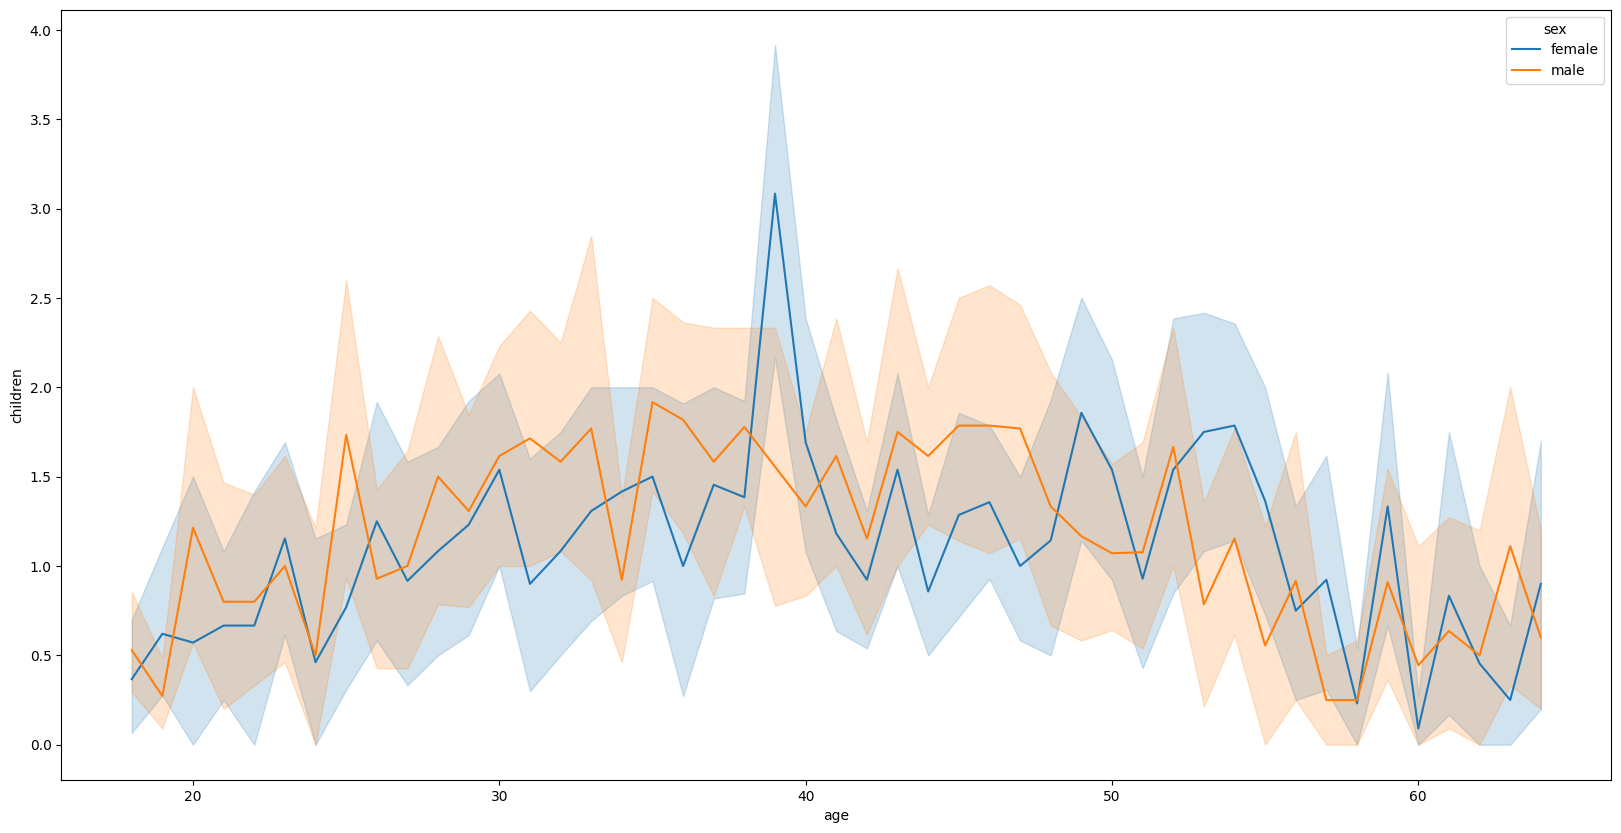

In [17]:
f,ax=plt.subplots(figsize=(20,10))
sns.lineplot(y="children",x="age",hue="sex",data=data)

как видно по признаку пола нету сильного перекоса в одну из сторон, но можно замтеить что у молодых людей, и людей
приклонного возраста детей будет поменьше, чем у людей промежутке от 30 до 50 лет.

теперь посмотрим как количество детей влияет на потраченные на страховку деньги в среднем.

<Axes: xlabel='children'>

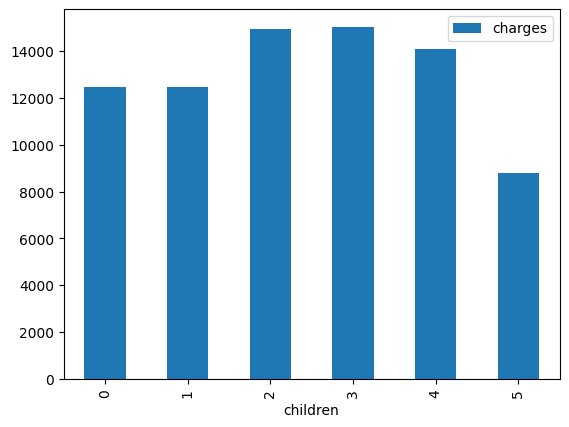

In [18]:
data[["children","charges"]].groupby("children").mean().plot.bar()

как было указано выше, люди в среднем тратят по 13 000 на страховку, и как видно здесь, люди с 2, 3 и 4 детьми тратят на страховку
больше среднего, бездетные и люди с 1 ребенком тратят чуть меньше среднего, люди с 5 детьми тратят значительно меньше среднего, но стоит учитывать,
что набор данных включает в себя всего 18 людей с 5 детьми и 24 с 4 детьми, на фоне 1200 людей вцелом, этот показатель выглядт сомнительно.

Посмотрим на графике зависимости строховки от возраста распределение по кол-ву детей

<Axes: xlabel='age', ylabel='charges'>

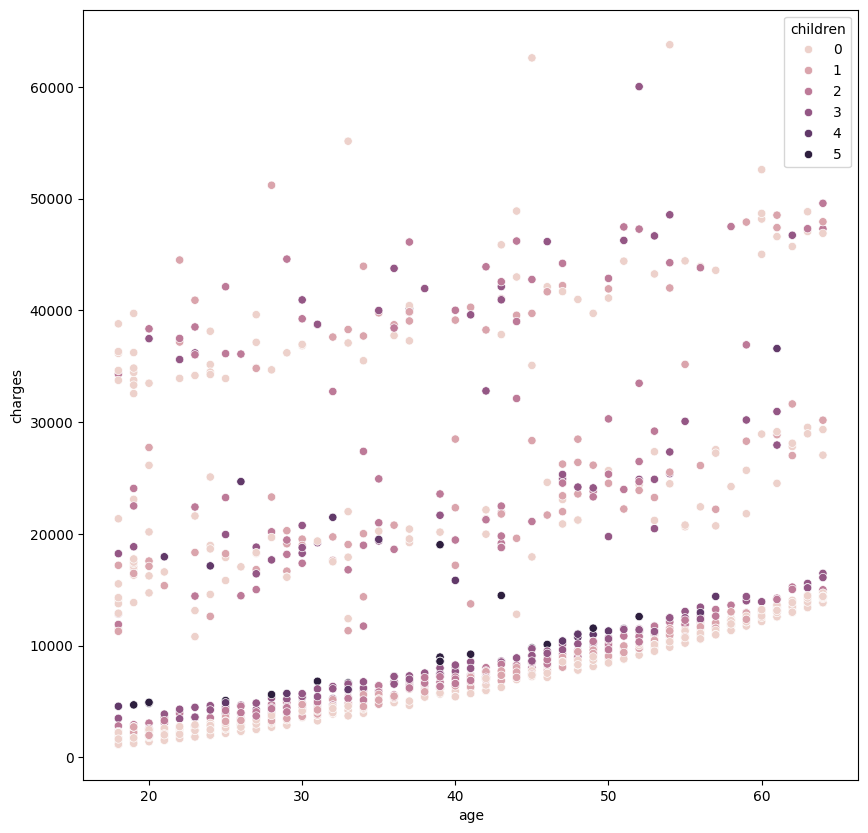

In [19]:
ax = plt.subplots(figsize=(10,10))
sns.scatterplot(y="charges",x="age",data=data,hue = "children")

Отлично, уже вдина некоторая зависимость, в нижнем кластере можно увидеть некоторый градиент, переходи от светлого к тёмному, значит количество детей влияет на страховку.

# курильщики

Для начала посмотрим какой процент людей курит.

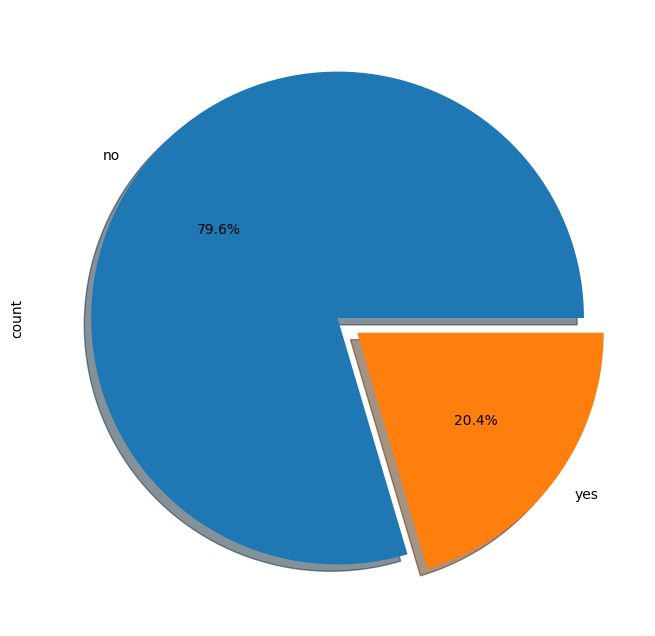

In [20]:
ax=plt.subplots(figsize=(18,8))
data["smoker"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

как видно каждый пятый человек курит, посмотрим сколько из них мужчин и женщин.

In [21]:
pd.crosstab(data.sex,data.smoker,margins="True").style.background_gradient(cmap='summer_r')

smoker,no,yes,All
sex,,,
female,512,107,619
male,478,147,625
All,990,254,1244


можно увидеть, что курящих мужчин в 1.5 раза больше, чем куряших женщин.

Зависит ли эта вредная привычка как-либо от возраста?

<Axes: xlabel='sex', ylabel='age'>

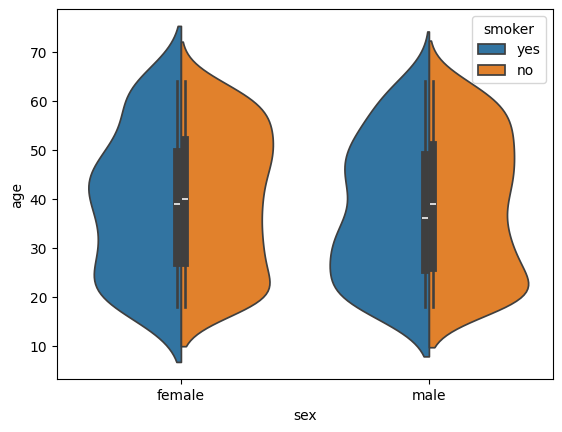

In [22]:
sns.violinplot(x="sex",y="age",hue="smoker",data=data,split="True")

здесь можно заметить, что у женщин пик зависимости от курения приходится на возраст от 40 до 50 лет, у мужчин это в свою очеред промежуток
от 20 до 30 лет

Связана ли дурна привычка как-либо с индексом массы тела?

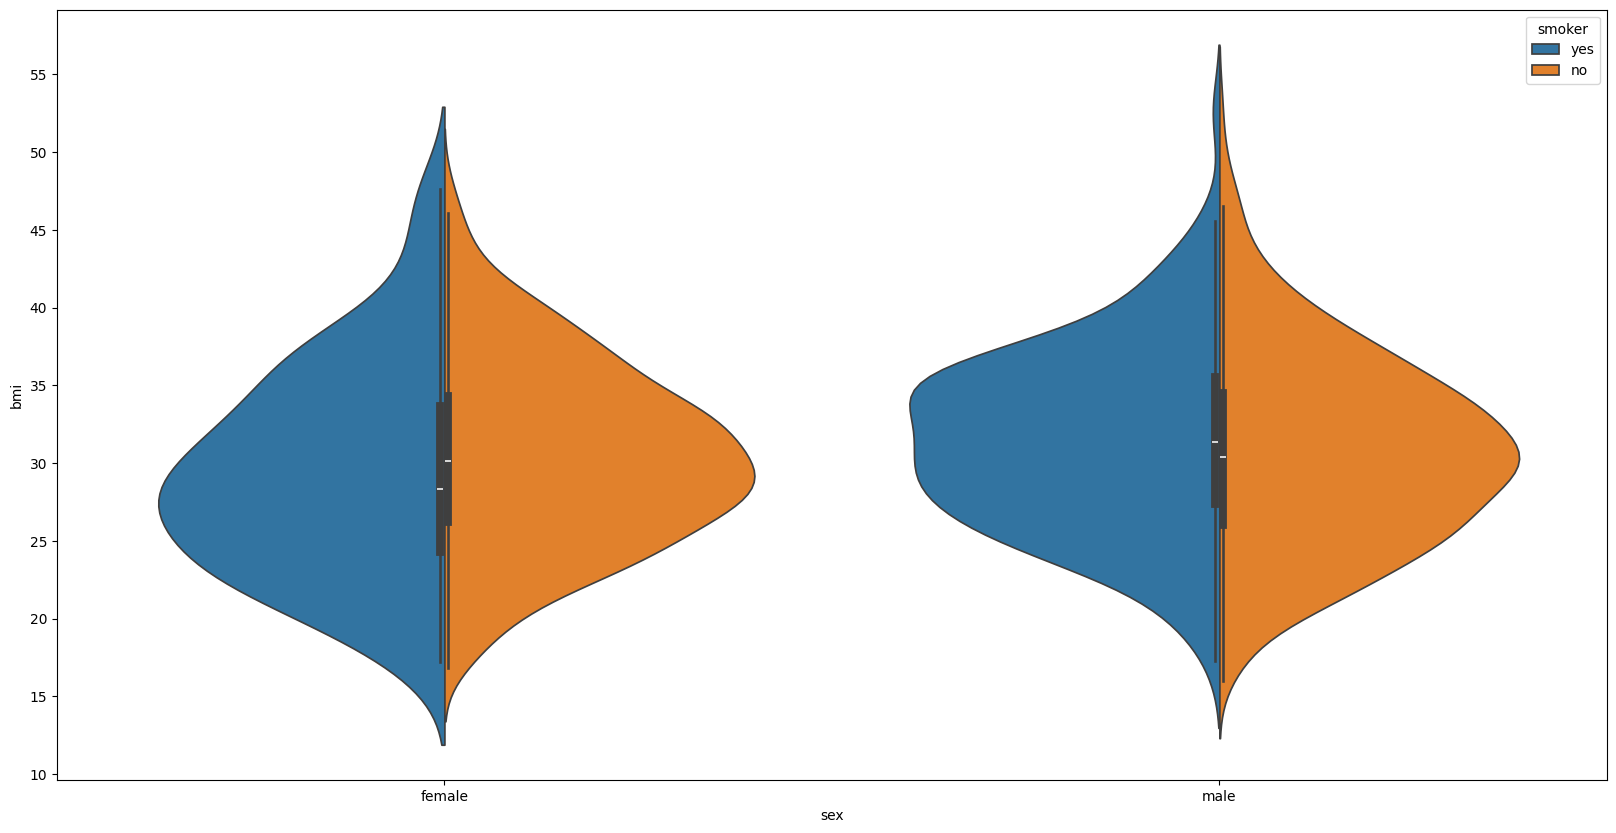

In [23]:
f,ax=plt.subplots(figsize=(20,10))
sns.violinplot(x="sex",y="bmi",hue="smoker",data=data,split=True)
ax=ax.set_yticks(range(10,60,5))

Ранее уже было показано, что подавляющая часть людей имеет индекс массы тела 25-30, у женщин в этом плане отклонений нет, хотя и 
можно заметить, что женщины с индексом массы тела 45+ в подавляющей части имеют вредную привычку, а воту мужчин можно заметить 
некоторое отклонение, можно увидеть, что пик,который в общей статитике приходился на 25-30, теперь приходится на 30-35.

Проверим корреляцию между количесвтом детей и наличием или отустствием вредной привычки.

In [24]:
pd.crosstab(data.children,data.smoker,margins=True).style.background_gradient(cmap="summer_r")

smoker,no,yes,All
children,,,
0,425,108,533
1,245,54,299
2,171,51,222
3,111,37,148
4,21,3,24
5,17,1,18
All,990,254,1244


переведем в процентные соотношения.

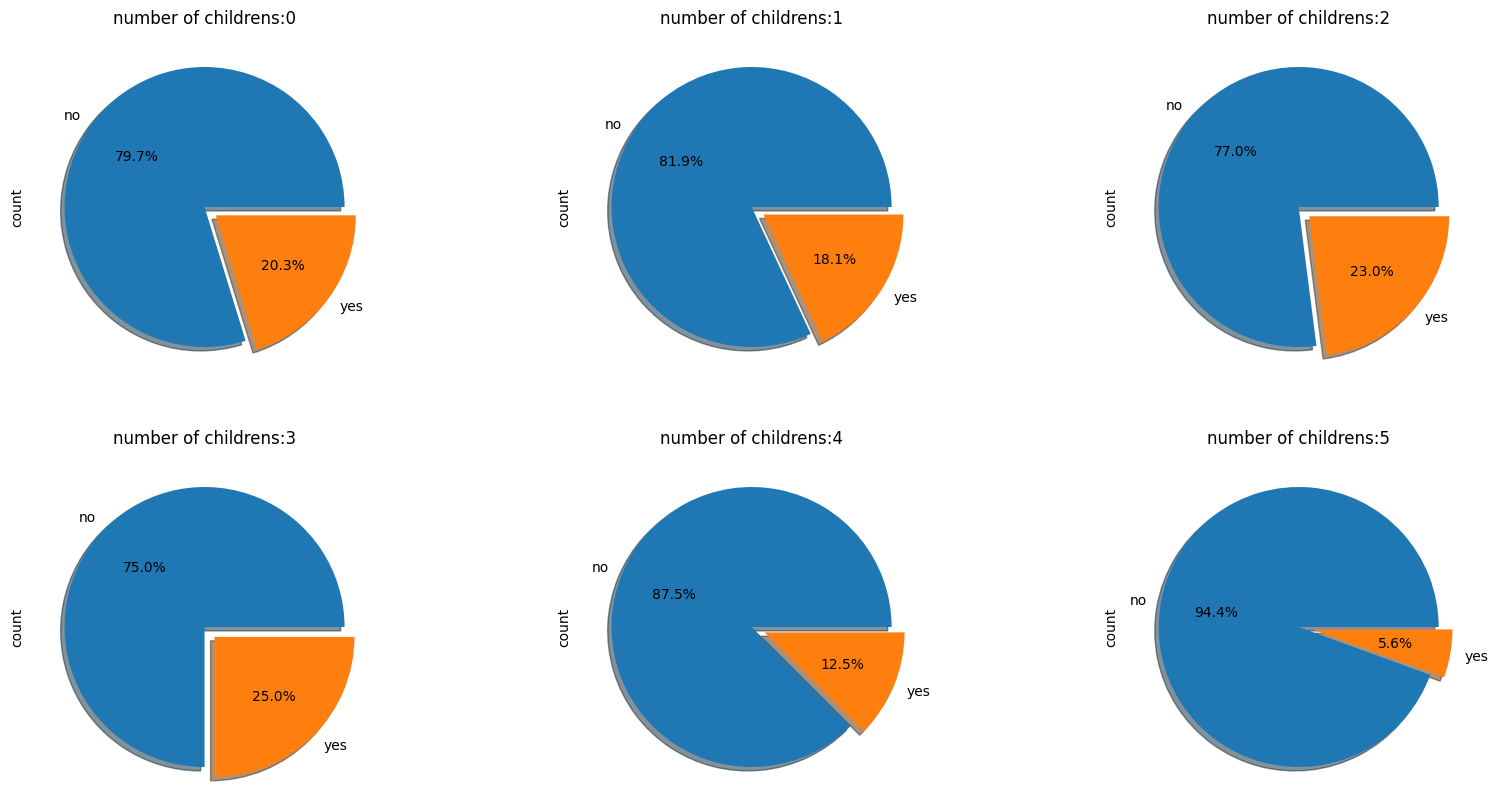

In [25]:
f,ax=plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    data[data.children==i]["smoker"].value_counts().plot.pie(explode=[0,0.1],ax=ax[i//3][i%3],autopct='%1.1f%%',shadow=True)
    ax[i//3][i%3].set_title(f"number of childrens:{i}")
plt.show()

как можно заметить человек с 4 и 5 детьми курят меньше всего, однако погрешность данных измерений довольно велика в меру
малого количества данных. Люди без детей по курению имеют почти такую же статистику как и общая. Люди с 1 ребнком курят меньше смреднего
люди с 2 и 3 детьми курят больше среднего.

Посмотрим сколько в среднем тратят те кто курят, и те кто нет.

In [26]:
data.groupby("smoker").agg(charges=("charges", 'mean'))

,charges
smoker,
no,8419.004648
yes,31825.852475


В среднем курящие люди тратят почти в 3 больше денег на страховку, чем люди без дурной привычки.

Посмотрим на курящих и некурящих людей на графике зависемости потраченных на страховку денег от возраста

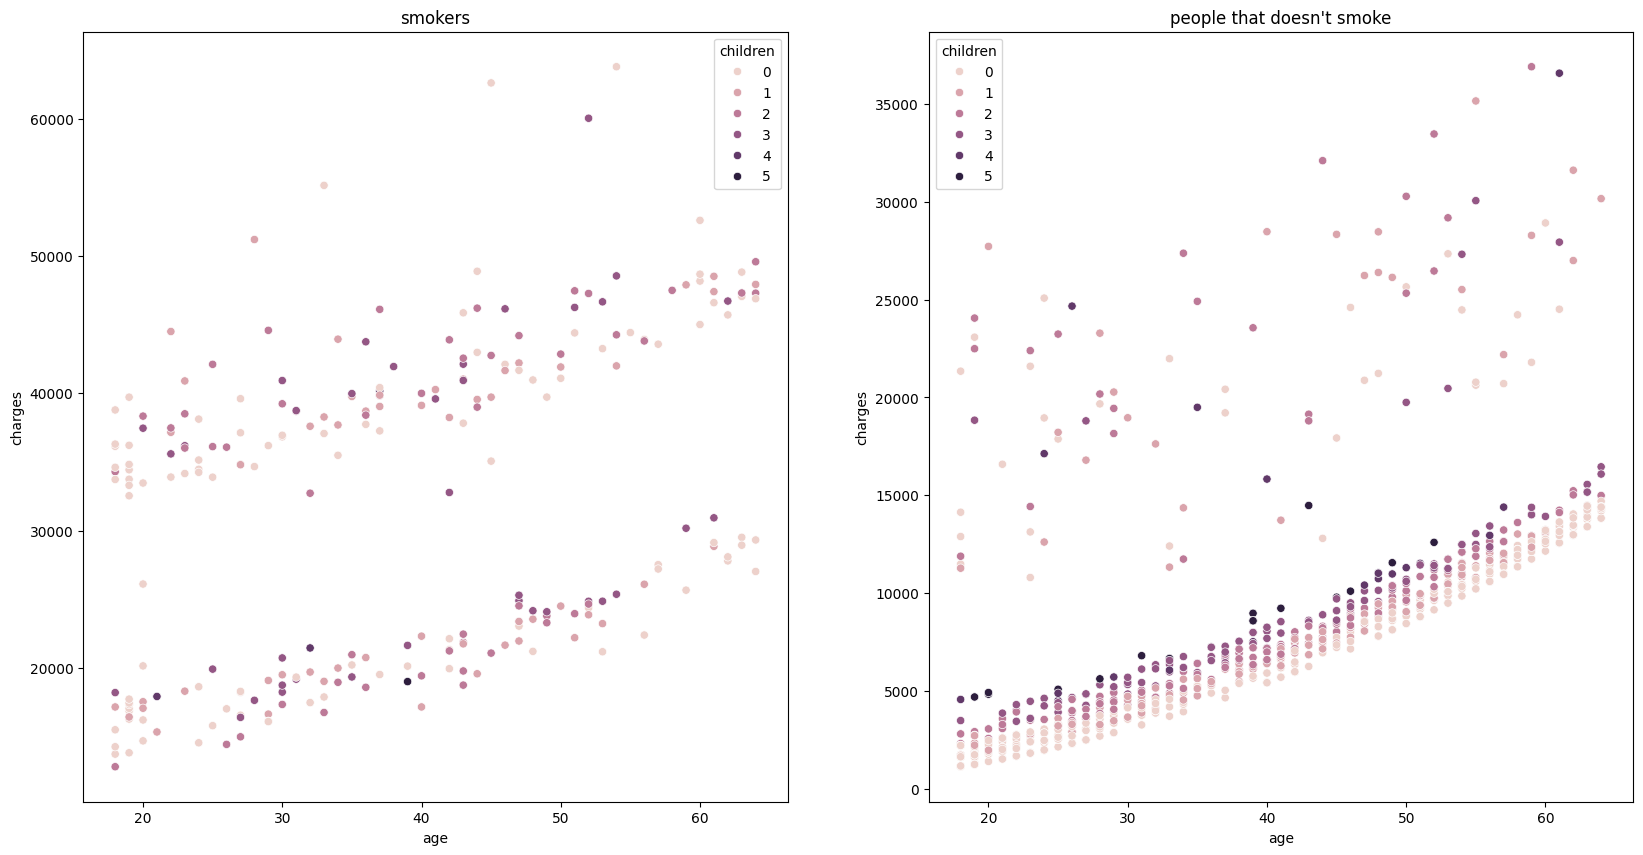

In [27]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(y="charges",x="age",data=data[data.smoker=="yes"],ax=ax[0],hue = "children")
ax[0].set_title("smokers")
sns.scatterplot(y="charges",x="age",data=data[data.smoker=="no"],ax=ax[1],hue = "children")
ax[1].set_title("people that doesn't smoke")
plt.show()

бинго, мы смогли чётко выделить контенгент людей и отчетливо видим, что некурящие люди в большей степени тратят на страховку 1 000  до 15 000 в зависмости от
возраста, курильщики в свою очередь тратят коллосальные деньги на страховку, то ли от того, что беспокоятся за свою жизнь, то ли потому что раз у них есть
деньги на сигареты, то и на страховку найдутся, причём у курильщиков всё ещё имеется некоторое разбиение на 2 кластера, один из которых тартит
от 10 000 до 30 000 тысяч, а второй от 30 000 до 50 000 в зависмости от возраста.

# регион

для начала посмотрим какие вообще регионы есть и сколько в каждом из них человек

In [28]:
pd.crosstab(data.region,data.sex,margins=True).style.background_gradient(cmap="summer_r")

sex,female,male,All
region,,,
northeast,147,150,297
northwest,152,150,302
southeast,165,171,336
southwest,155,154,309
All,619,625,1244


Даже с учетом половой пренадлежности данный распределены равномерно, в каждом регионе примерно по 300 человек.

Посмотрим по количеству лет.

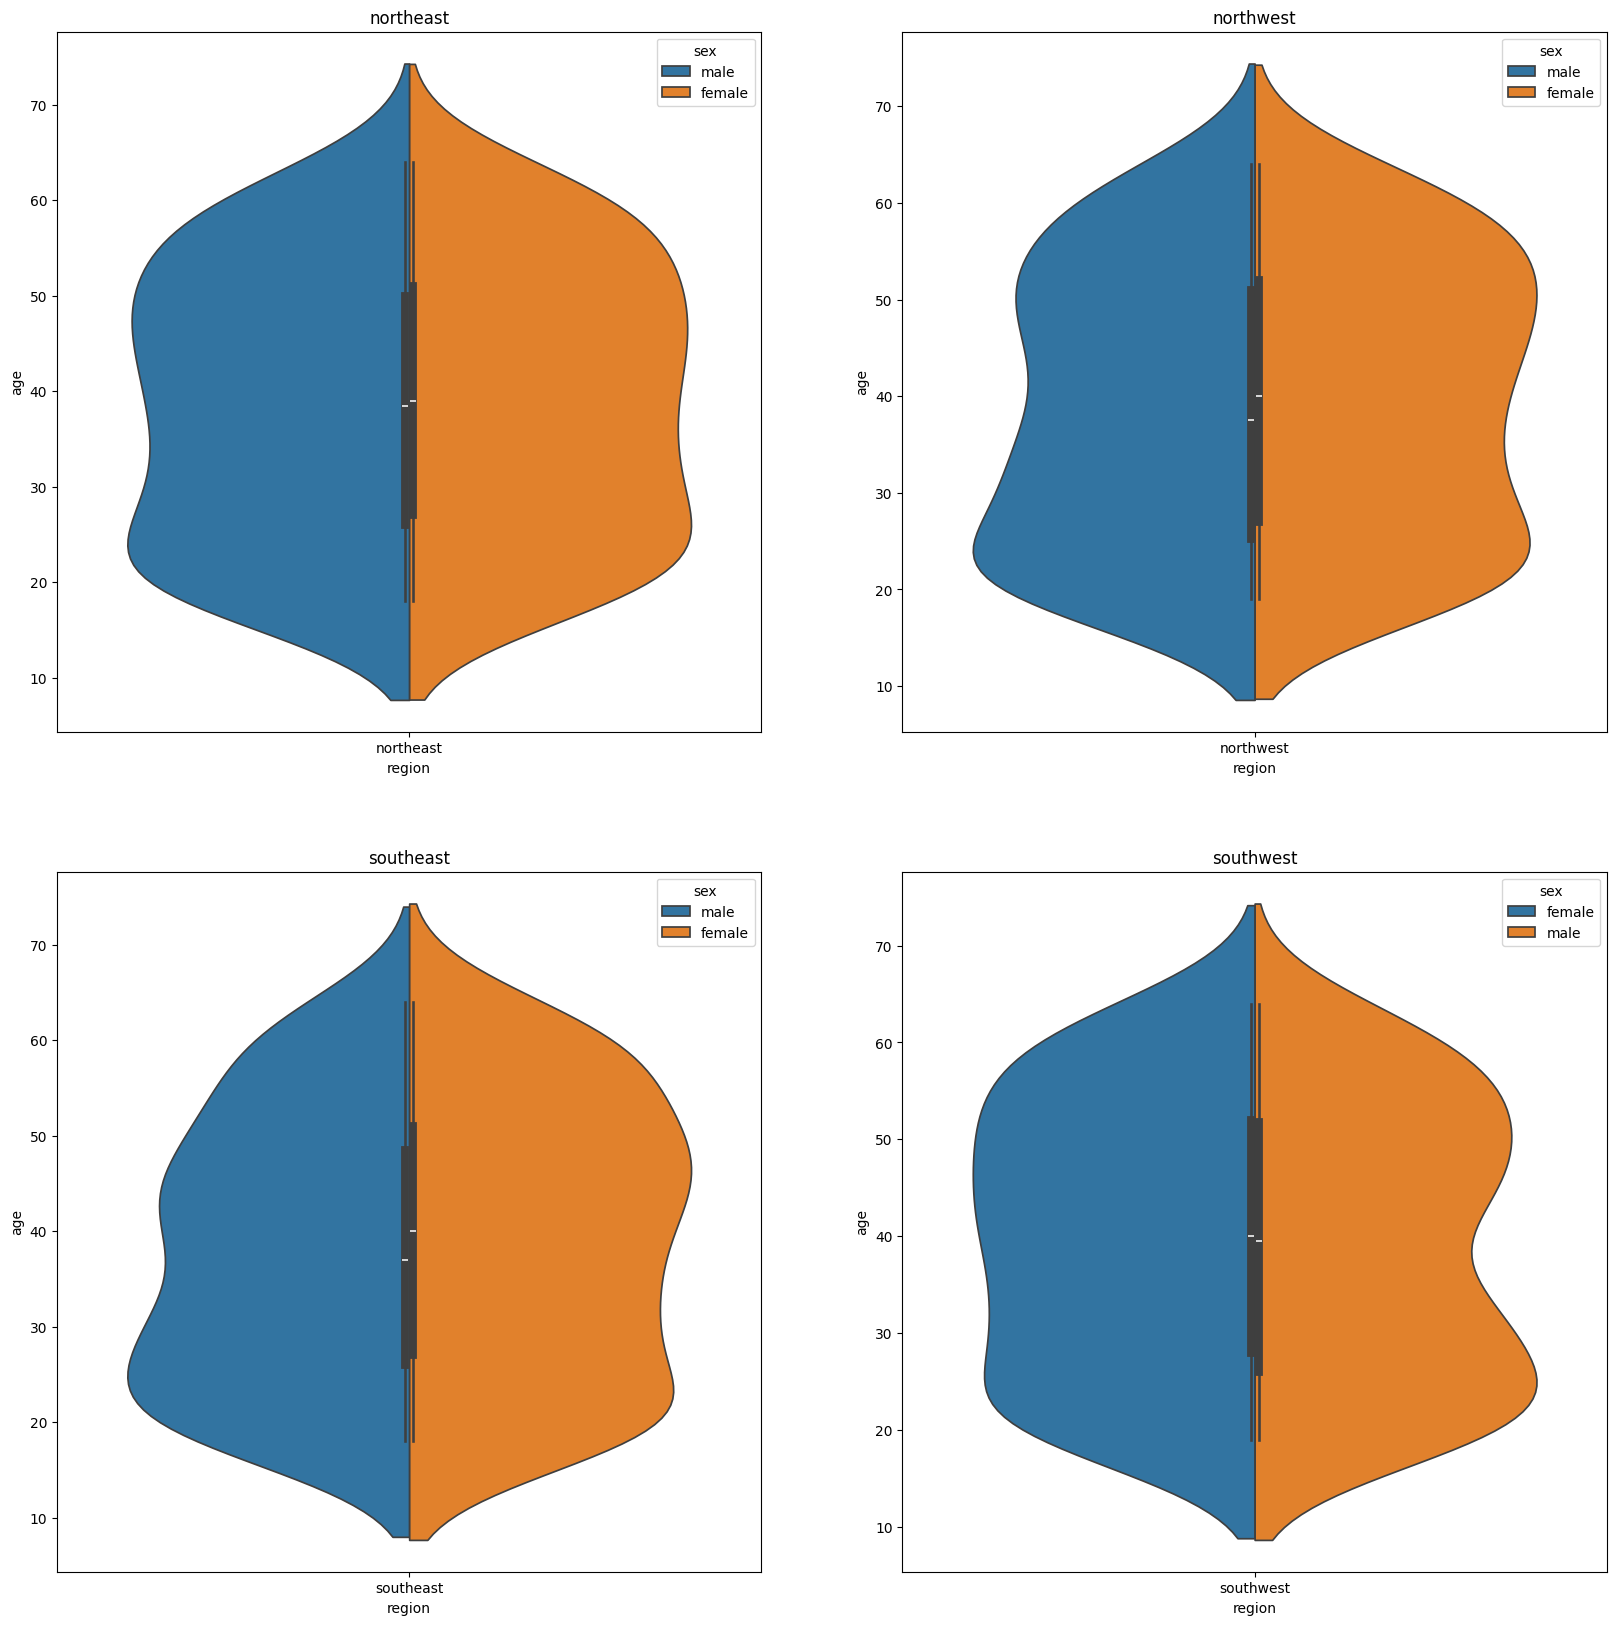

In [29]:
rgs = ("northeast","northwest","southeast","southwest") #северо-восток,северо-запад,юго-восток,юго-запад
f,ax=plt.subplots(2,2,figsize=(20,20))
for i in range(4):
    sns.violinplot(y="age",x="region",hue ="sex",data=data[data.region==rgs[i]],ax=ax[i//2][i%2],split=True)
    ax[i//2][i%2].set_title(f"{rgs[i]}")
plt.show()

Интересная картина, разберемся по порядку, 

у северо-востока довльно ровное распределение в у женщин, у мужчин есть лёгкая просадка в промежутке 25-45 лет, 

у севера-зпада интересная итуация, у мужчин преобладает возраст в районе 25 лет, у женщин небольшая просадка,

у юго-востока ситуация схожая с северо-западом, то же пробладание у мужчин возраста 25 лет, тот небольшой просадок у женщин,

с юго-запада ровное распределение у мужчин, но у женщин преобладает возраст в 25 лет, при этом есть сильная просадка в 30-45 лет

отобразим индекс массы тела по тому же сценарию

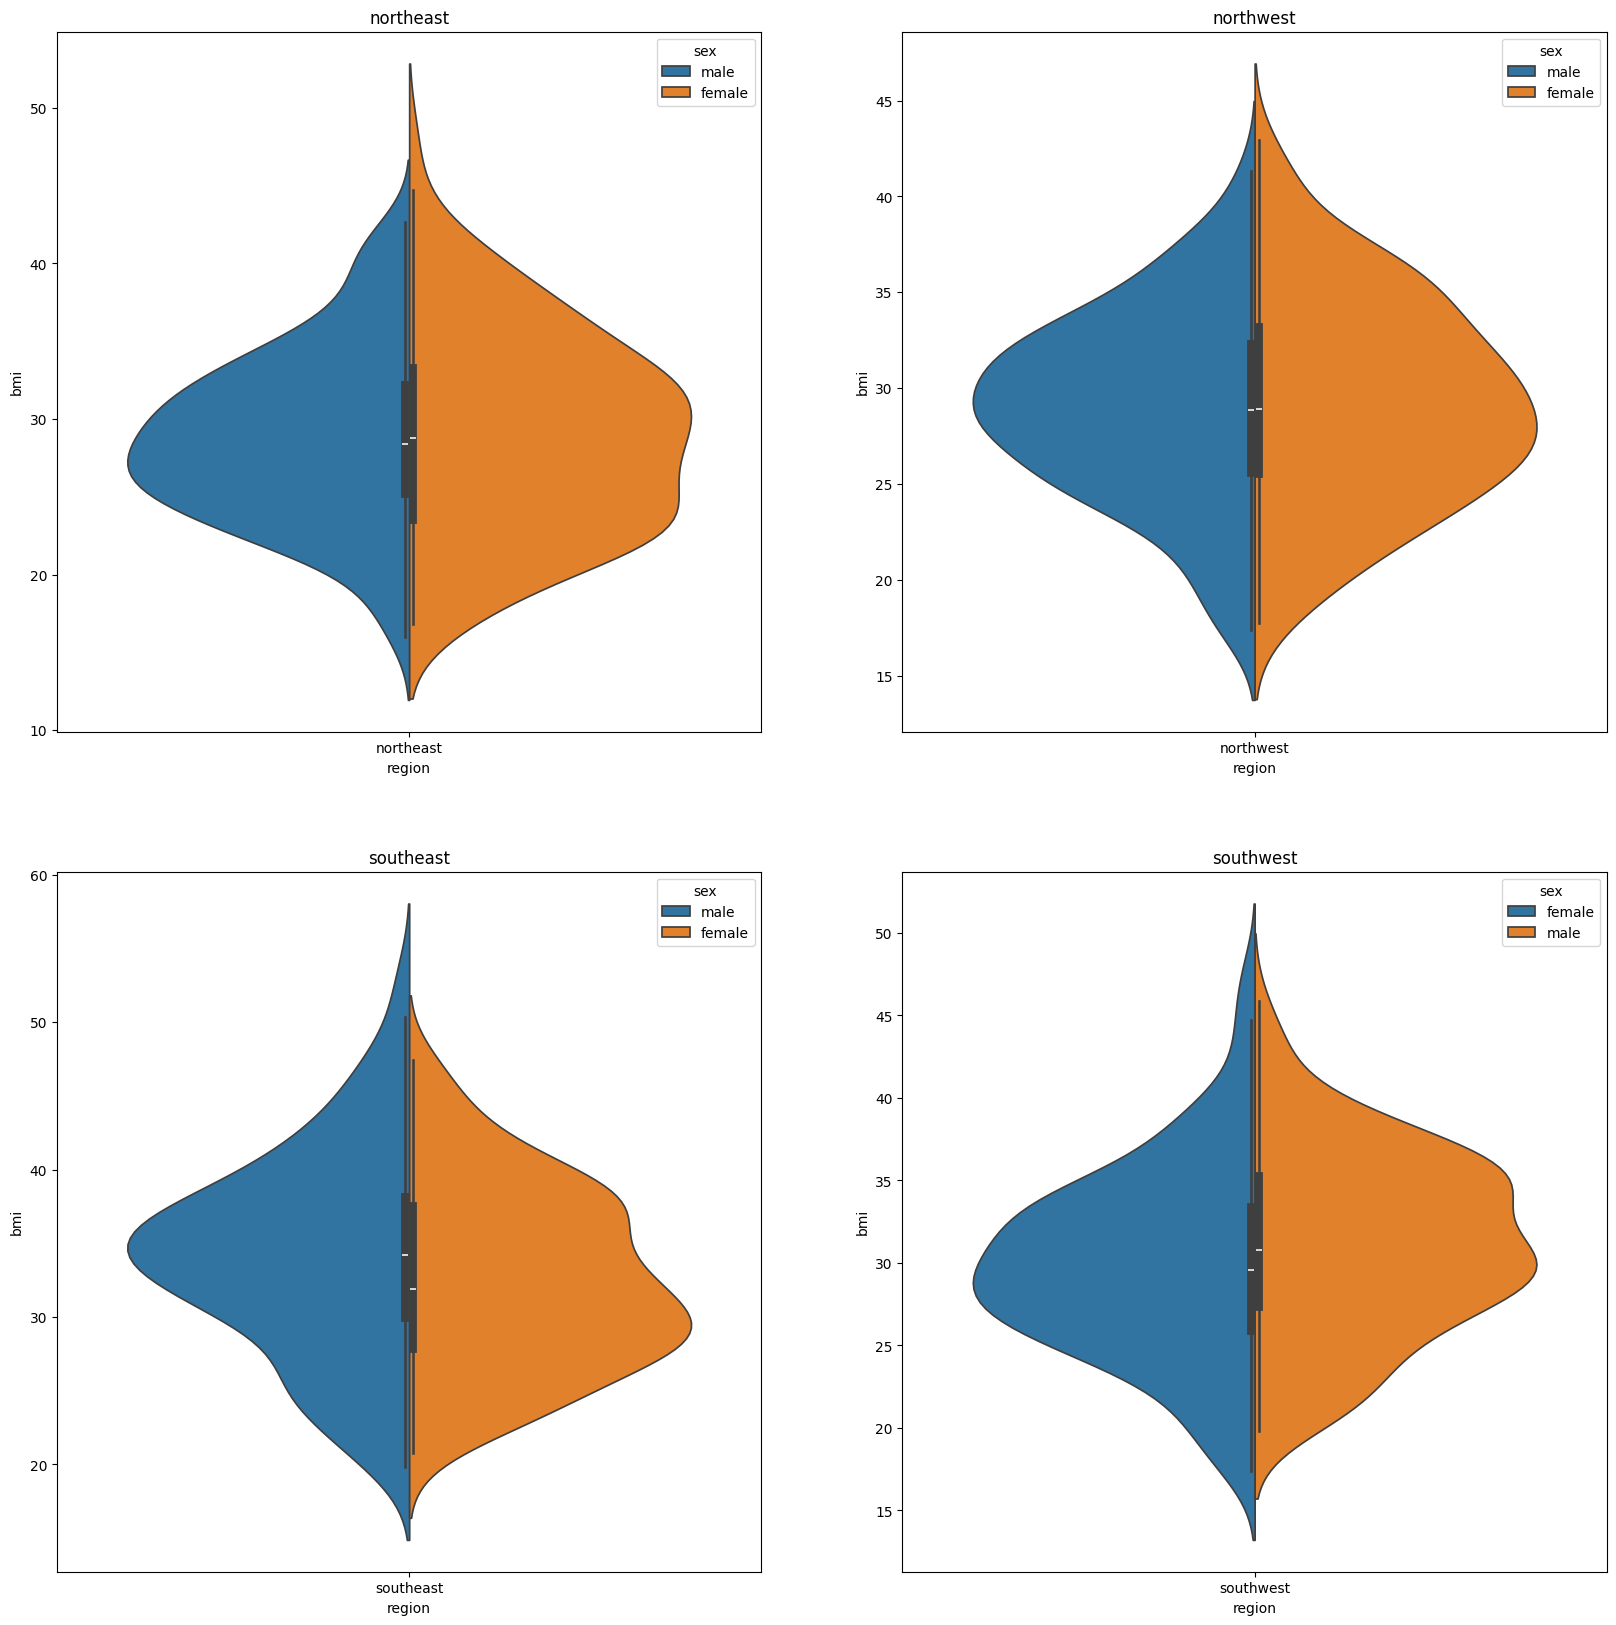

In [30]:
rgs = ("northeast","northwest","southeast","southwest") #северо-восток,северо-запад,юго-восток,юго-запад
f,ax=plt.subplots(2,2,figsize=(20,20))
for i in range(4):
    sns.violinplot(y="bmi",x="region",hue ="sex",data=data[data.region==rgs[i]],ax=ax[i//2][i%2],split=True)
    ax[i//2][i%2].set_title(f"{rgs[i]}")
plt.show()

так же по порядку \
у северо-востока у женщин проблемно определить исредний индекс массы тела, в пике он сглаживется, при этом есть небольшое кол-во женщин с индексом 45+\
у северо-запада всё довльно стабильно\
у юго-востока у мужчин мягко сказать довльно плотная ситуация, т.к. индек массы тела у большей чатси мужчин около 35 (предел ожирения первой степени и начало второй), \
у юго-запада у женщин индекс массы тела 30-35.

Посмотрим сколько детей в среднем у жителей каждого из регионов

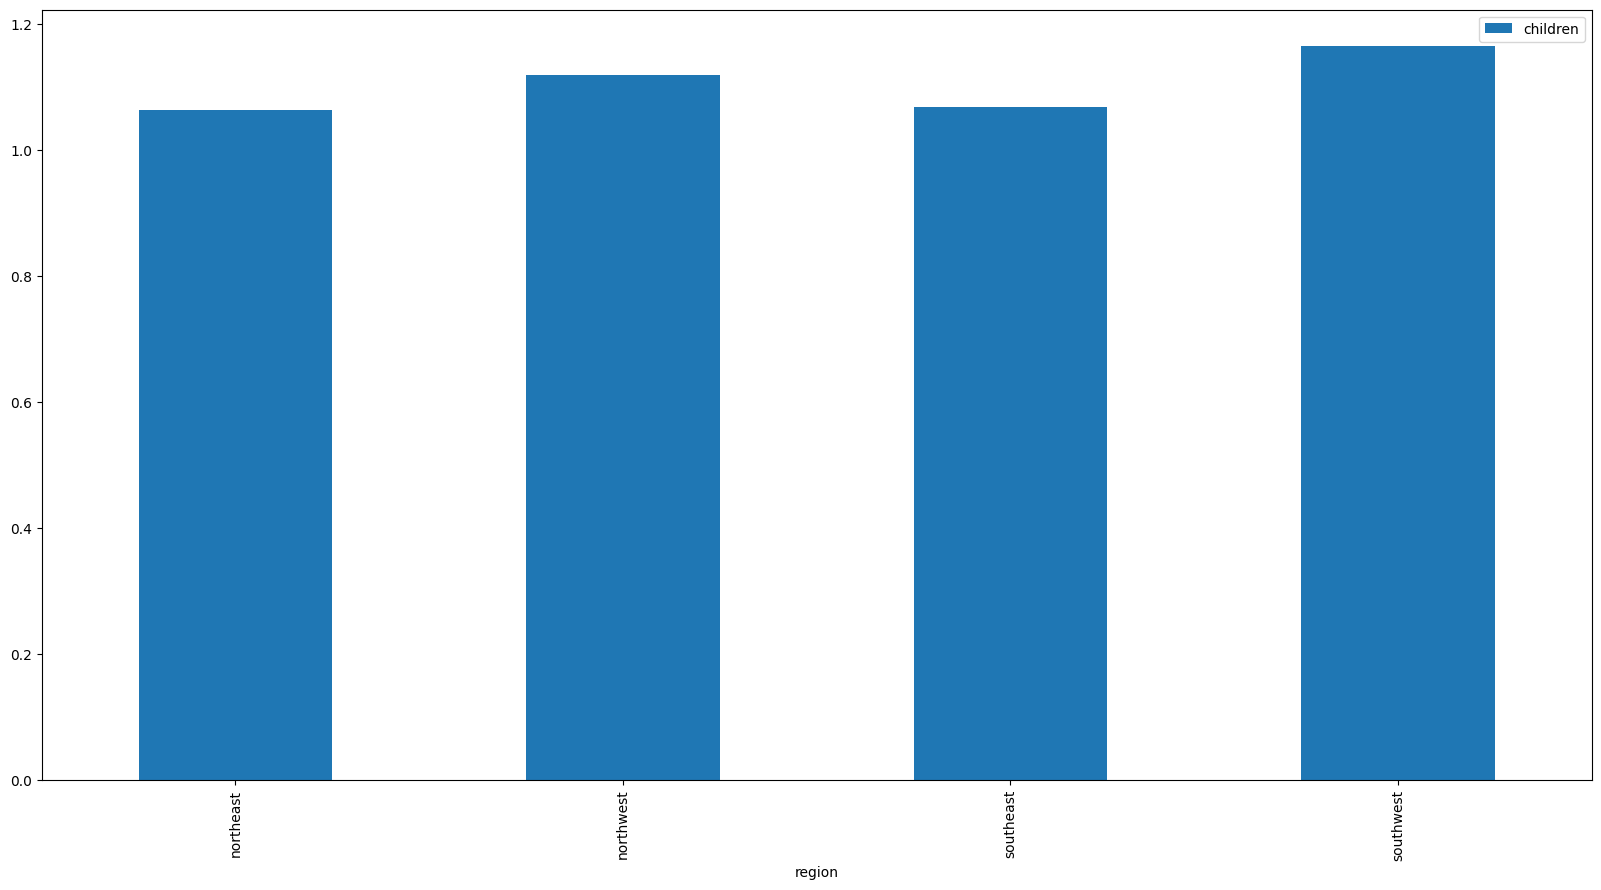

In [31]:
f,ax = plt.subplots(figsize=(20,10))
data[["children","region"]].groupby("region").mean().plot.bar(ax=ax)
plt.show()

In [32]:
pd.crosstab(data.region,data.children,margins=True).style.background_gradient(cmap="summer_r")

children,0,1,2,3,4,5,All
region,,,,,,,
northeast,136,67,46,38,7,3,297
northwest,125,70,60,41,5,1,302
southeast,143,87,63,32,5,6,336
southwest,129,75,53,37,7,8,309
All,533,299,222,148,24,18,1244


Как видно среднее детей зависит от региона, но не настолько сильно, разница не больше 5 процентов, но можно заметить, что многодетные семьи всё таки\
предпочитают южные регионы.

Теперь посмотрим в каком регионе больше курильщиков.

Как можно заметить больше всего курильщиков 

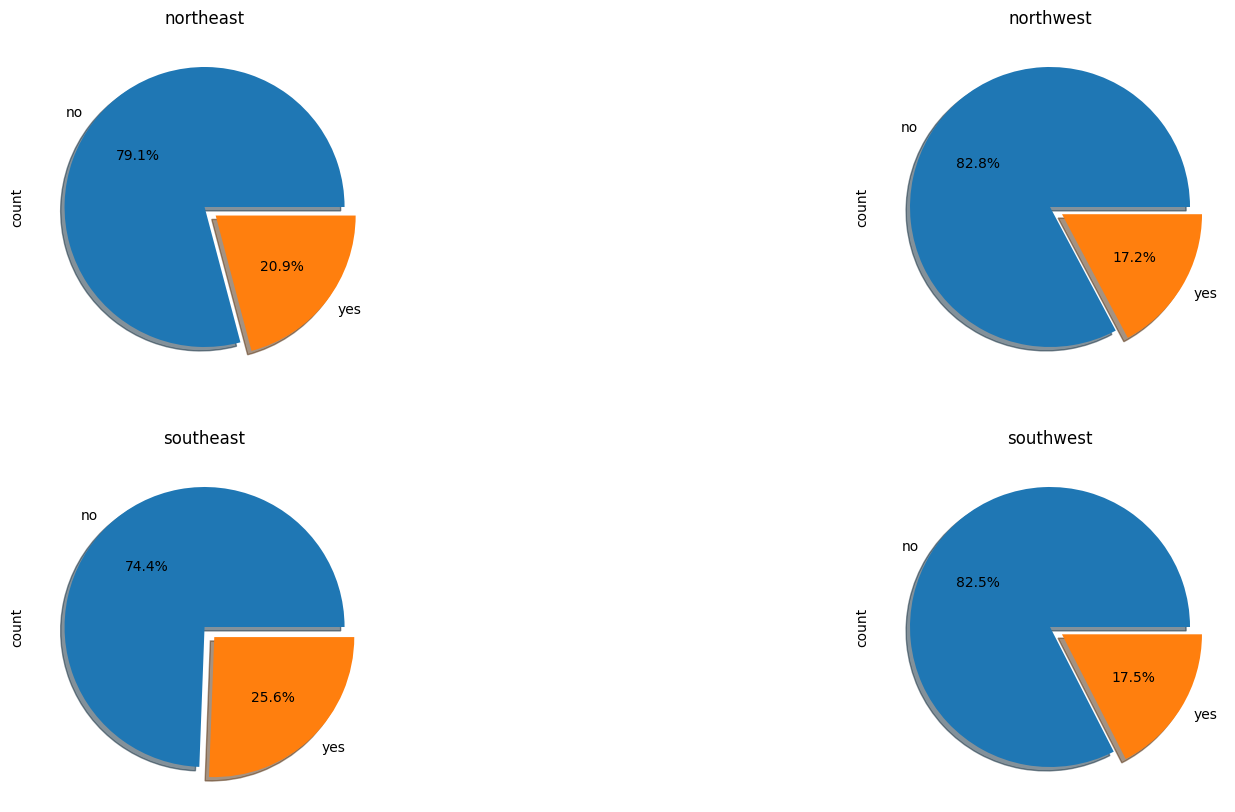

In [33]:
rgs = ("northeast","northwest","southeast","southwest") #северо-восток,северо-запад,юго-восток,юго-запад
f,ax=plt.subplots(2,2,figsize=(20,10))
for i in range(4):
    data[data.region==rgs[i]]["smoker"].value_counts().plot.pie(explode=[0,0.1],ax=ax[i//2][i%2],autopct='%1.1f%%',shadow=True)
    ax[i//2][i%2].set_title(rgs[i])
plt.show()

Как видно на юговостоке процент курильщиков самый высокий, на северо западе и юго западе самый низкий.

Зная что курильщики платят больше всего по страховке, верятнеее всего, что именно на юговостоке затраты на страховку будут самыми высокими

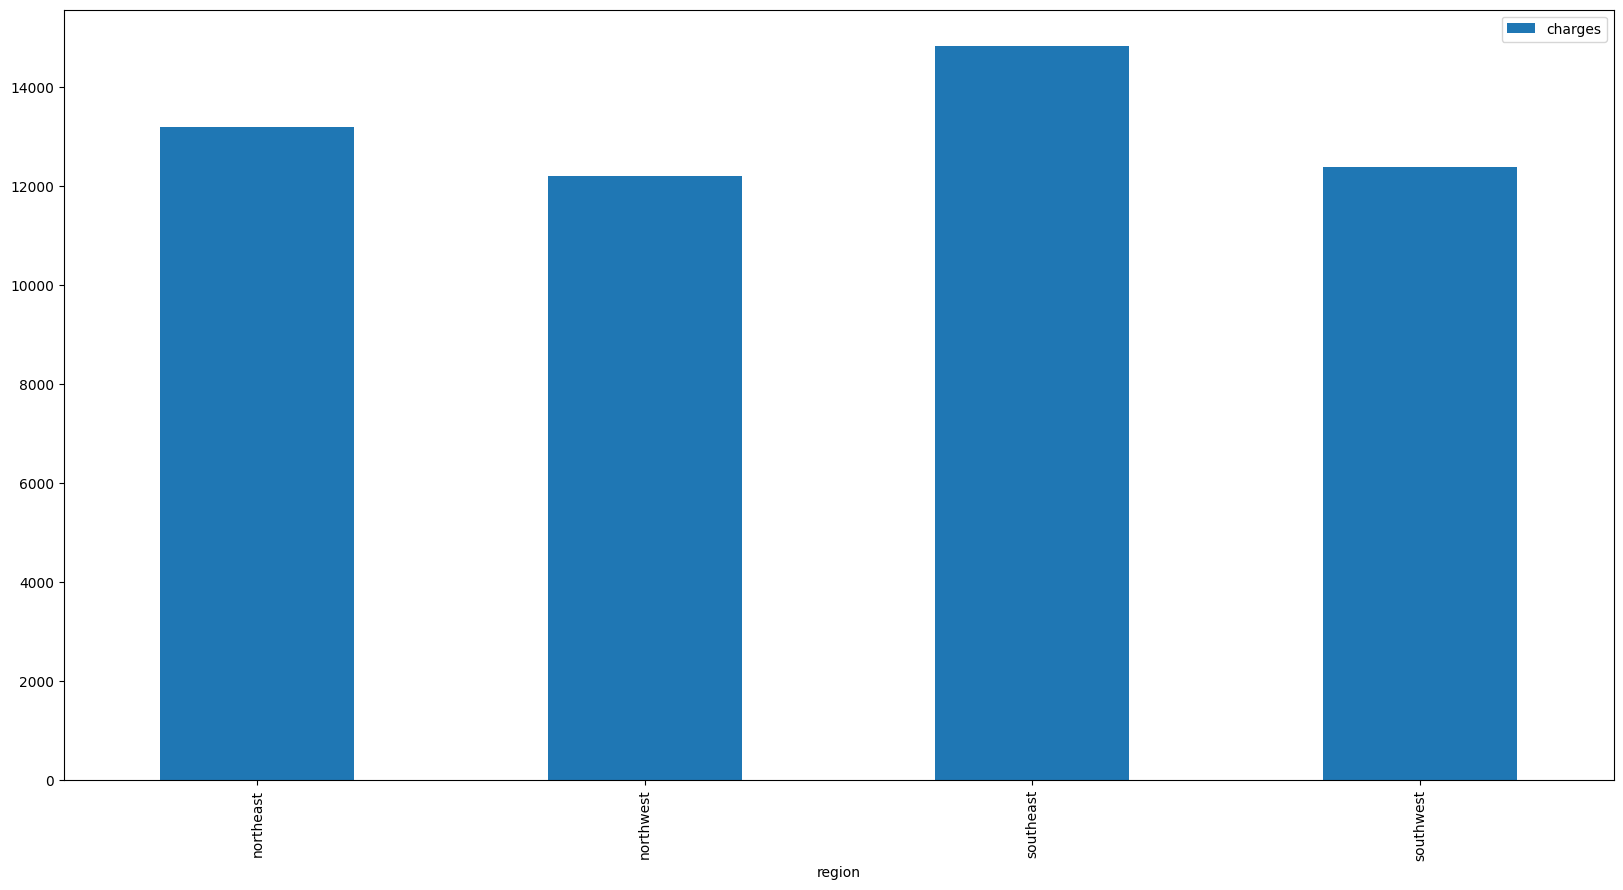

In [34]:
f,ax = plt.subplots(figsize=(20,10))
data[["charges","region"]].groupby("region").mean().plot.bar(ax=ax)
plt.show()

Собственно, говоря так оно и вышло.

# Корреляция признаков

C:\Users\админ\AppData\Local\Temp\ipykernel_11320\3156787024.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d["sex"].replace(["male","female"],[0,1],inplace=True)
C:\Users\админ\AppData\Local\Temp\ipykernel_11320\3156787024.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d["sex"].replace(["

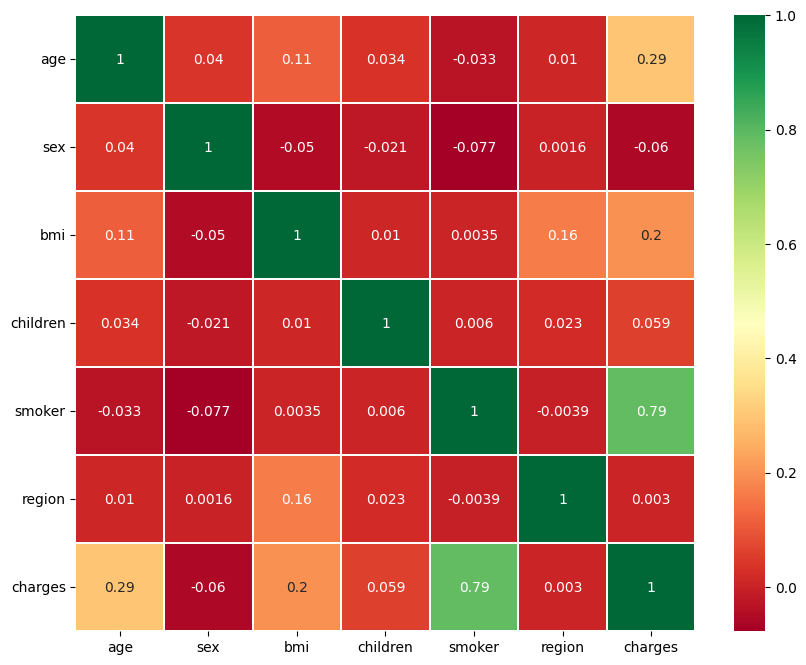

In [35]:
d = copy.copy(data)

d["sex"].replace(["male","female"],[0,1],inplace=True)
d["smoker"].replace(["no","yes"],[0,1],inplace=True)
d["region"].replace(["northeast","northwest","southeast","southwest"],[1,2,3,4],inplace=True)

sns.heatmap(d.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Feature Engineering

# age_group

Разделение возраста на возрастные группы от 18 до 64, разделение на 4 группы с разрывом в 12 лет.

In [36]:
data['age_group']=0
data.loc[(data['age']>=18)&(data['age']<=30),'age_group']=0
data.loc[(data['age']>30)&(data['age']<=42),'age_group']=1
data.loc[(data['age']>42)&(data['age']<=54),'age_group']=2
data.loc[data['age']>54,'age_group']=3
data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [37]:
data['age_group'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
age_group,
0,419
2,317
1,286
3,222


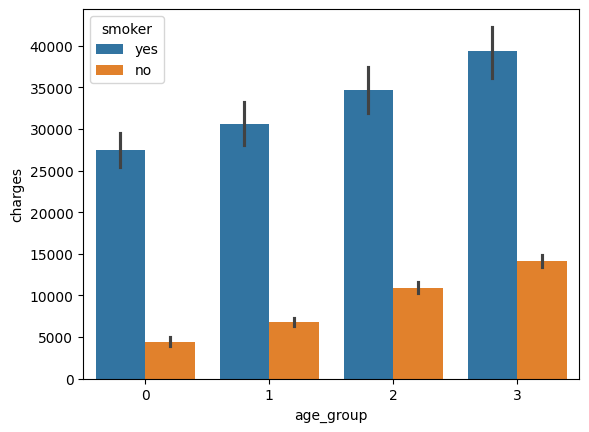

In [38]:
sns.barplot(x='age_group',y='charges',data=data,hue="smoker")
plt.show()

# bmi_group

Классификация степеней ожирения.

In [39]:
data['bmi_group']=0
data.loc[(data['bmi']<19),'bmi_group']=0
data.loc[(data['bmi']>=19)&(data['bmi']<=25),'bmi_group']=1
data.loc[(data['bmi']>25)&(data['bmi']<=30),'bmi_group']=2
data.loc[(data['bmi']>30)&(data['bmi']<=35),'bmi_group']=3
data.loc[data['bmi']>35,'bmi_group']=4
data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,0,2
1,18,male,33.770,1,no,southeast,1725.55230,0,3
2,28,male,33.000,3,no,southeast,4449.46200,0,3
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,2


In [40]:
data['bmi_group'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
bmi_group,
2,361
3,352
4,293
1,214
0,24


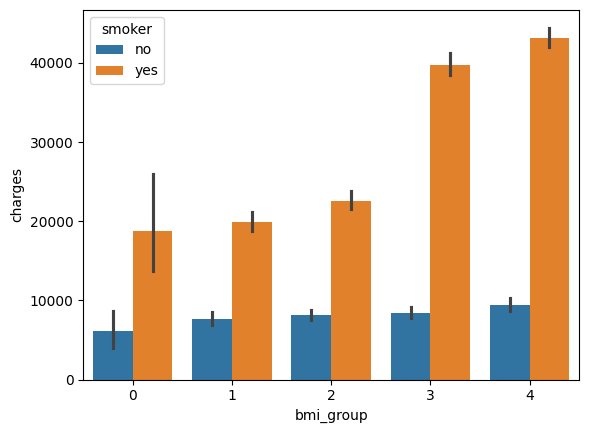

In [41]:
sns.barplot(x='bmi_group',y='charges',data=data,hue="smoker")
plt.show()

А теперь вспомним про разбение на 2 кластера у курящих людей и что получим?

<Axes: xlabel='age', ylabel='charges'>

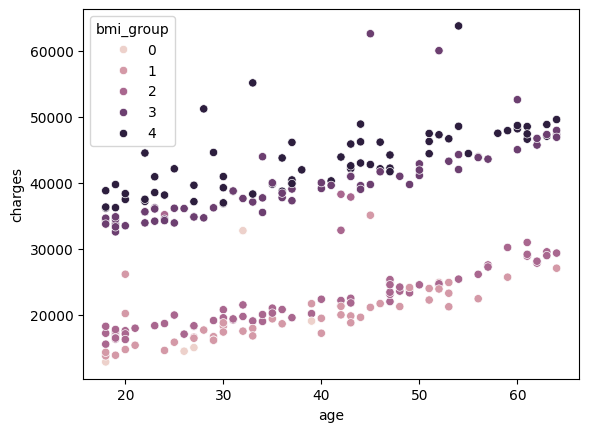

In [42]:
sns.scatterplot(y="charges",x="age",data=data[data.smoker=="yes"],hue = "bmi_group")

# child_insure

Дополнительное страхование в случае наличия 2 и более детей.

In [43]:
data['child_insure']=0
data.loc[(data['children']<=1),'child_insure']=0
data.loc[data['children']>1,'child_insure']=1
data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,child_insure
0,19,female,27.900,0,yes,southwest,16884.92400,0,2,0
1,18,male,33.770,1,no,southeast,1725.55230,0,3,0
2,28,male,33.000,3,no,southeast,4449.46200,0,3,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,2,0


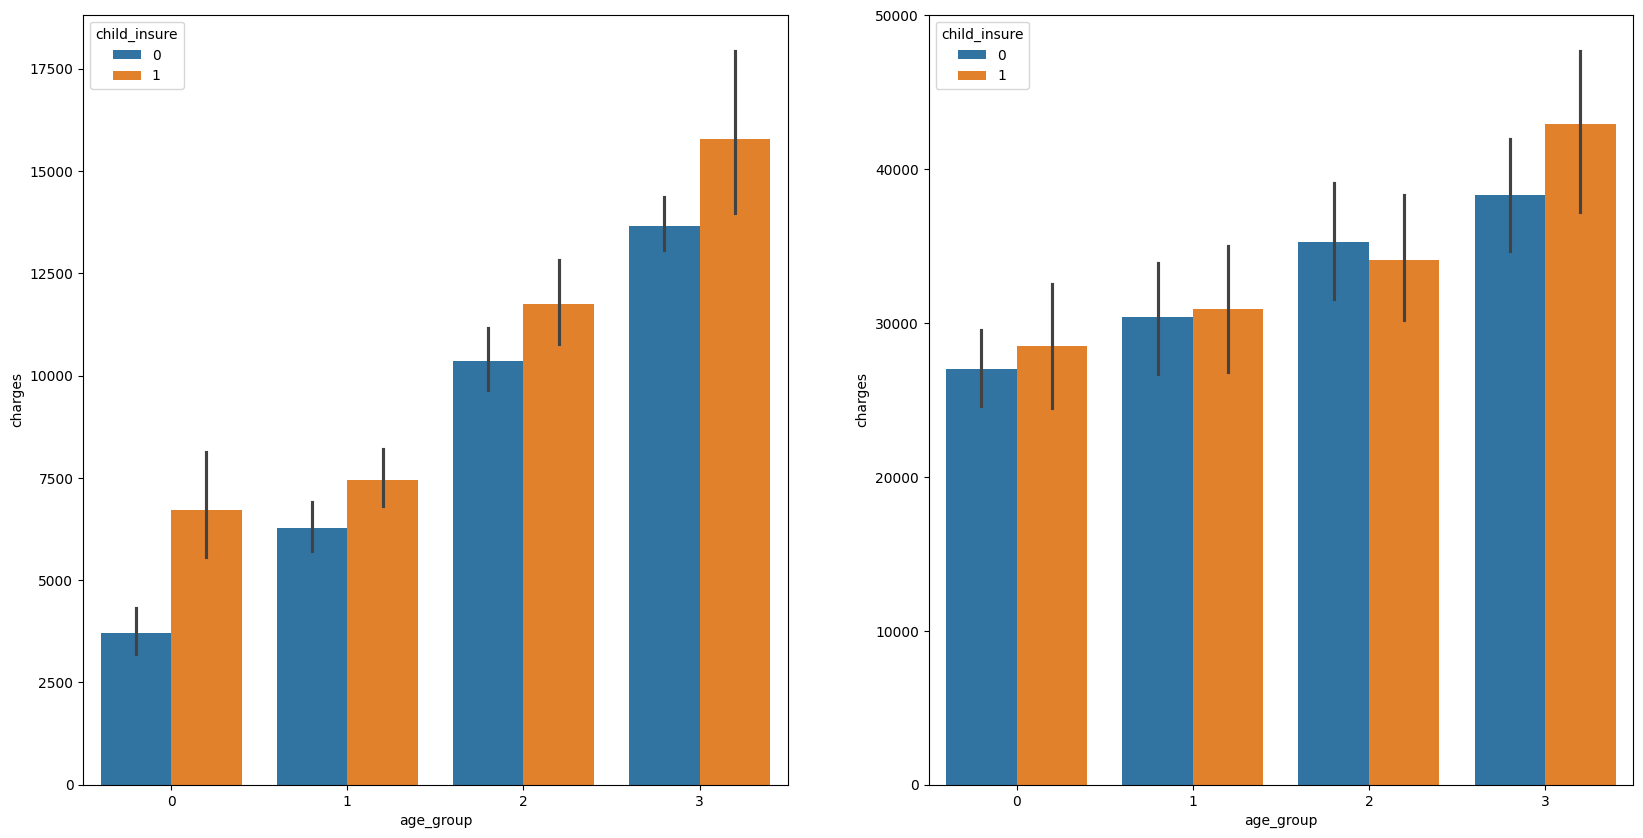

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(y="charges",x="age_group",data = data[data.smoker=="no"],hue="child_insure",ax=ax[0])
ax[0].set_title("smokers")
sns.barplot(y="charges",x="age_group",data = data[data.smoker=="yes"],hue="child_insure",ax=ax[1])
ax[1].set_titles("not smoker")
plt.show()

# преобразование строк в числа

In [45]:
data["sex"].replace(["male","female"],[0,1],inplace=True)
data["smoker"].replace(["no","yes"],[0,1],inplace=True)
data["region"].replace(["northeast","northwest","southeast","southwest"],[1,2,3,4],inplace=True)
data.head(5)

C:\Users\админ\AppData\Local\Temp\ipykernel_11320\2166214475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["sex"].replace(["male","female"],[0,1],inplace=True)
C:\Users\админ\AppData\Local\Temp\ipykernel_11320\2166214475.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["sex"].repl

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,child_insure
0,19,1,27.900,0,1,4,16884.92400,0,2,0
1,18,0,33.770,1,0,3,1725.55230,0,3,0
2,28,0,33.000,3,0,3,4449.46200,0,3,1
3,33,0,22.705,0,0,2,21984.47061,1,1,0
4,32,0,28.880,0,0,2,3866.85520,1,2,0


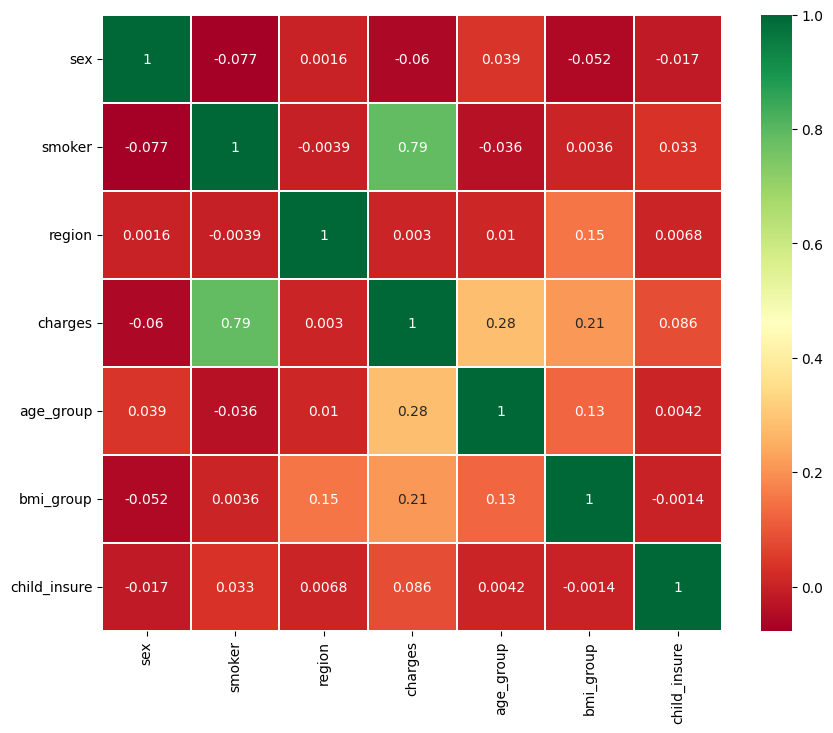

In [46]:
data.drop(["age","bmi","children"],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# итоги

В ходе работы выяснелось следующее влияние переменных на страховку: \
**возраст**: пропорционально возрасту растут и траты на страховку \
**пол**: влияние пола на страховку не велико \
**индекс массы тела**: с ростом индекса массы тела растут и траты на страховку \
**дети**:наличие детей немного увеличивает траты на страховку \
**курение**: в значительной степени влияет на страховку (курящие люди платят примерно в 2.5 раза больше) \
**регион**:влияние не велико

В итоге были взяты признаки: **курение**, **наличие детей**, **возрастная группа** и **группа по индексу массы тела**, эти признаки влияют на потраченные на страховку деньги сильнее всего\
Отброшенные признаки: **регион** и **пол**, эти признаки слабо влияют на потраченные на страховку деньги, в плане корреляции с другими признаками у пола она очень слабая, у индекса массы тела имеется только небольшая корреляция с регионом.